In [2]:
import numpy as np
import pandas as pd
from scipy import stats

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [ ]:
# H0 : Mu = 13.20
# Ha : Mu < 13.20

In [6]:
z_test = (12.20 - 13.20) / (2.5 / np.sqrt(40))
z_test

-2.5298221281347035

In [7]:
p_value = stats.norm.cdf(z_test)
p_value

0.005706018193000826

Fail to reject H0 where p-value > α = .01 level, it means we could not accuse of the company for substandard wages 

EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?
CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [49]:
df = pd.read_excel('soil.xlsx')

In [51]:
df.isna().sum()

Soil1    5
Soil2    0
dtype: int64

In [39]:
df = df.head(30)

In [40]:
df.tail()

,Soil1,Soil2
25,1.896,1.192
26,1.737,1.489
27,1.740,1.379
28,1.708,1.501
29,1.548,1.277


In [27]:
df.shape

(30, 2)

In [ ]:
# H0 : mu1 = mu2
# Ha : mu1 != mu2 

In [28]:
df.Soil1.shape

(30,)

In [29]:
df.Soil2.shape

(30,)

In [41]:
leveneTest = stats.levene(df['Soil1'], df['Soil2'])
leveneTest

LeveneResult(statistic=0.2323198108973329, pvalue=0.631622932753579)

As per the levene test, p-value is greater than alpha and we should accept the variance is True

In [31]:
# AVG Soil1
df.Soil1.mean()

1.6918000000000002

In [32]:
# AVG Soil2
df.Soil2.mean()

1.407633333333333

Calculate the T-test for the means of two independent samples of score

In [45]:
indTest = stats.ttest_ind(df.Soil1,df.Soil2,equal_var=True)
indTest

Ttest_indResult(statistic=5.134893443609086, pvalue=3.4402046436336477e-06)

In [46]:
indTest.pvalue

3.4402046436336477e-06

In [47]:
# Compare p-value and alpha
alpha = 0.01

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Reject the null


EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [3]:
df = pd.read_excel('2015 PISA Test.xlsx')
df

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [28]:
df.groupby('Continent_Code')[['internet_users_per_100','Math','Reading','Science']].agg(['mean','std',stats.skew,'count'])

internet_users_per_100                                 \
                                 mean        std          skew count   
Continent_Code                                                         
AF                          43.359918   7.297226 -2.068816e-15     2   
AS                          68.455613  21.086060 -7.050774e-01    17   
EU                          77.274888  12.425773 -4.732765e-02    37   
OC                          86.391704   2.589686  0.000000e+00     2   
SA                          60.180494   9.772455 -1.133557e+00     7   

                      Math                                    Reading  \
                      mean        std          skew count        mean   
Continent_Code                                                          
AF              363.212100   5.099513  2.364143e-14     2  355.457400   
AS              466.216647  64.356490  1.315655e-01    17  454.059682   
EU              477.981449  35.150403 -1.194421e+00    37  476.164608   
OC              494.559750   0.938401  0.000000e+00     2  506.085650   
SA              402.887700  18.128894 -2.872015e-01     7  425.359229   

                                              Science             \
                      std      skew count        mean        std   
Continent_Code                                                     
AF               7.916909  0.000000     2  381.074250   7.536556   
AS              57.048962 -0.090195    17  467.945847  56.671371   
EU              37.720545 -1.271092    37  478.299381  34.450616   
OC               4.504341  0.000000     2  511.648700   2.340241   
SA              19.709688  0.251128     7  421.747186  18.470319   

                                    
                        skew count  
Continent_Code                      
AF             -1.596229e-14     2  
AS              1.235206e-01    17  
EU             -8.452568e-01    37  
OC              5.164690e-14     2  
SA             -1.597585e-01     7

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

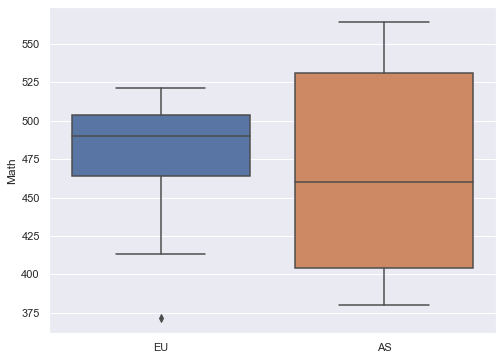

In [32]:
sns.set(rc={'figure.figsize':(8,6)})
data = [df.loc[df['Continent_Code'] == 'EU','Math'], df.loc[df['Continent_Code'] == 'AS','Math']]
sns.boxplot(data=data)
plt.xticks(ticks=[0,1],labels=['EU', 'AS'])
plt.ylabel('Math');


In [ ]:
# H0 : MuEU = MuAS
# Ha : MuEU != MuAS

In [10]:
leveneTest = stats.levene(df.loc[df['Continent_Code'] == 'EU','Math'], df.loc[df['Continent_Code'] == 'AS','Math'])
leveneTest

LeveneResult(statistic=14.300030628780679, pvalue=0.0004037413184451079)

Pvalue is less than alpha, variance will be accepted as False

In [35]:
indTest = stats.ttest_ind(df.loc[df['Continent_Code'] == 'EU','Math'], df.loc[df['Continent_Code'] == 'AS','Math'], equal_var=False)
indTest

Ttest_indResult(statistic=0.7068451468277963, pvalue=0.4876143690111764)

In [30]:
# Decision
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the null")
else:
    print("Fail to reject the null")

Fail to reject the null


EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128

In [36]:
df = pd.read_excel('students_2014.xlsx')
df

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,1995-03-22,NaT,NaT,NaN,NaN,0.0,0,72.35,NaN,...,88.24,81.50,60.02,81.44,In state,1.0,NaN,NaN,7.0,1.0
1,20278,1995-01-01,NaT,NaT,NaN,Philosophy,0.0,0,70.66,179.20,...,89.45,85.25,70.19,73.27,NaN,1.0,NaN,NaN,5.0,2.0
2,20389,1994-12-31,NaT,NaT,NaN,NaN,0.0,0,70.68,198.52,...,96.73,86.88,71.20,84.24,In state,NaN,NaN,NaN,8.0,7.0
3,22820,1994-12-01,NaT,NaT,NaN,business administration,1.0,0,NaN,198.34,...,74.06,88.68,55.89,73.16,In state,1.0,NaN,NaN,2.0,6.0
4,24559,1994-11-10,NaT,NaT,NaN,NaN,1.0,1,67.43,128.17,...,82.61,77.30,65.52,80.45,Out of state,1.0,NaN,NaN,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,34021,1987-07-18,2011-08-01,2017-05-08,4.0,accounting,1.0,0,NaN,NaN,...,87.72,84.99,65.31,NaN,In state,0.0,1.0,18.0,1.0,10.0
431,40697,1987-04-29,2011-08-01,2016-05-09,4.0,NaN,0.0,0,68.50,131.92,...,91.01,86.87,70.25,82.67,In state,0.0,3.0,26.0,6.0,15.0
432,34272,NaT,2011-08-01,2016-05-09,4.0,nursing,0.0,1,68.10,130.07,...,81.05,85.76,58.16,81.87,NaN,0.0,3.0,29.0,6.0,10.0
433,33628,NaT,2011-08-01,2017-05-08,4.0,Nursing,1.0,1,69.27,157.26,...,75.59,85.97,66.84,79.35,In state,0.0,1.0,14.0,4.0,10.0


In [ ]:
# H0 : MuEng = MuMath
# Ha : MuEng != MuMath

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ids           435 non-null    int64         
 1   bday          427 non-null    datetime64[ns]
 2   enrolldate    406 non-null    datetime64[ns]
 3   expgradate    406 non-null    datetime64[ns]
 4   Rank          406 non-null    float64       
 5   Major         276 non-null    object        
 6   Gender        426 non-null    float64       
 7   Athlete       435 non-null    int64         
 8   Height        408 non-null    float64       
 9   Weight        376 non-null    float64       
 10  Smoking       411 non-null    float64       
 11  Sprint        374 non-null    float64       
 12  MileMinDur    392 non-null    object        
 13  English       409 non-null    float64       
 14  Reading       425 non-null    float64       
 15  Math          422 non-null    float64   

In [50]:
leveneTest = stats.levene(df['English'].fillna(df["English"].mean()), df['Math'].fillna(df["Math"].mean()))
leveneTest

LeveneResult(statistic=14.802383909487423, pvalue=0.00012812663823873243)

Pvalue is less than alpha, variance will be considered as False

In [46]:
indTest = stats.ttest_ind(df['English'].fillna(df["English"].mean()), df['Math'].fillna(df["Math"].mean()), equal_var=False)
indTest

Ttest_indResult(statistic=34.12748503421807, pvalue=3.532675272192575e-160)

In [48]:
# Decision
alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null
